<h1><center>Markov Chains Project</center></h1>
<h2><center>Team JLRCactus</center></h2>

## Imports ##

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys as sys

## Main ##

### Variables ###

In [23]:
# Values of dimensions n and m
n = 1000
m = 8000
# Initial random vector
x0 = np.random.randint(low=0, high=2, size=n)*2-1 # A random array of -1 and +1

# To be found vector
X = np.random.randint(low=0, high=2, size=n)*2-1 # A random array of -1 and +1 

# Known matrix W
W = np.random.normal(loc=0, scale=1, size=[m,n]) # W ~ N(0,1)

beta0=0.1


### Run ###

## Tools ##

In [3]:
def ReLU(x) :
    return x * (x > 0)

In [4]:
def compute_Y(W, X) :
    n = W.shape[1]
    return ReLU((W @ X)/np.sqrt(n))

In [5]:
def compute_H(W, x, Y) :
    diff = Y - compute_Y(W, x)
    return diff.T.dot(diff)

In [6]:
def random_flip(x) :
    i = np.random.randint(low=0, high=len(x))
    new_x = x.copy()
    new_x[i] = -new_x[i]
    return new_x

In [7]:
def accept(W, x0, x1, beta, Y) :
    return min(1, np.exp(-beta*( compute_H(W, x1, Y) - compute_H(W, x0, Y) )))

In [8]:
def rec_error(x0, X, n):
    n = len(X)
    return (x0-X).T.dot(x0-X) / (4*n)

## Metropolis Algorithm ##

In [49]:
def metropolis(W, X, x0, threshold, beta0) :
    
    e = sys.maxsize
    beta = beta0
    Y_true = compute_Y(W, X)
    n = len(X)
    errors = []
    energies = []
    betas = []
    i = 0
    nbre_iter= 3000
    from_last_beta = 0
    beta_augm =0.2
    treshold = nbre_iter/40
    while e > threshold and i < nbre_iter: 
        i +=1
        from_last_beta += 1
        
        x1 = random_flip(x0)
        a = accept(W, x0, x1, beta, Y_true)
        
        if a >= np.random.uniform() : # Swap with prob metropolis
            x0 = x1
        
        if (from_last_beta> treshold and np.std(energies[-200:]) < m/285.7):
            print(i, end=', ')
            beta += beta_augm
            from_last_beta = 0
        energies.append(compute_H(W, x0, Y_true))        
        e = rec_error(x0, X, n)
        errors.append(e)      
        betas.append(beta)
        
    return x0, errors, energies, betas

In [25]:
found_X, errors, energies, betas = metropolis(W, X, x0, 0, beta0)

805
2663
2739


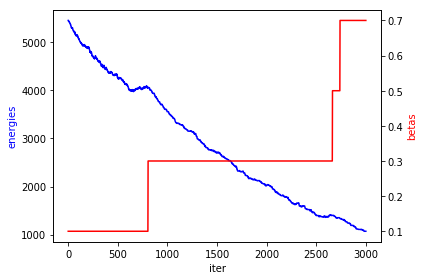

In [26]:
fig, ax1 = plt.subplots()

s1 = energies
ax1.plot(s1, 'b')
ax1.set_xlabel('iter')

ax1.set_ylabel('energies', color='b')

ax2 = ax1.twinx()
s2 = betas
ax2.plot(s2, 'r')
ax2.set_ylabel('betas', color='r')

fig.tight_layout()
plt.show()

In [27]:
betas[-1]

0.7

In [28]:
min(errors)

0.083000000000000004

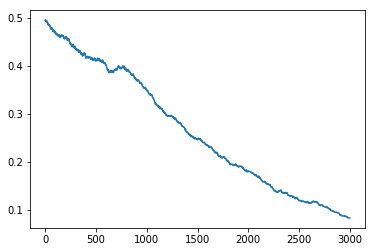

In [29]:
plt.plot(errors)
plt.show()

In [30]:
(found_X != X).sum()

83

## Find expected value and std dev ##

In [50]:
def exp_std_error(number_experiments=10):
    
    mean_list = []
    std_list = []
    
    for m in range(1000, 11000, 1000):
    
        error_m = []

        for j in range(0,number_experiments):

            #  drawing W and X
            x0 = np.random.randint(low=0, high=2, size=n)*2-1 # A random array of -1 and +1
            X = np.random.randint(low=0, high=2, size=n)*2-1 # A random array of -1 and +1 
            W = np.random.normal(loc=0, scale=1, size=[m,n]) # W ~ N(0,1)

            print()
            print("---- New experiment with alpha=%s ----" % m/n)
            found_X, errors, energies, betas = metropolis(W, X, x0, 0, beta0)

            error_m.append(min(errors))

        mean = np.mean(error_m)
        std_dev = np.std(error_m)
        
        mean_list.append(mean)
        std_list.append(std_dev)
    
    return mean_list, std_list

In [48]:
mean_list, std_list = exp_std_error()
mean_list, std_list


---- New experiment with m=1000 ----
76 152 379 455 531 636 712 788 864 940 1016 1092 1168 1244 1320 1396 1472 1548 1624 1700 1776 1852 1928 2004 2080 2156 2232 2308 2384 2460 2536 2612 2688 2764 2840 2916 2992 
---- New experiment with m=1000 ----
76 152 228 304 380 456 532 608 684 787 863 939 1015 1091 1167 1243 1319 1395 1471 1547 1623 1699 1775 1851 1927 2003 2079 2155 2231 2307 2383 2459 2535 2611 2687 2763 2839 2915 2991 
---- New experiment with m=1000 ----
76 152 349 425 501 577 653 729 805 881 957 1033 1109 1185 1261 1337 1413 1489 1565 1641 1717 1793 1869 1945 2021 2097 2173 2249 2325 2401 2477 2553 2629 2705 2781 2857 2933 
---- New experiment with m=1000 ----
76 152 228 401 477 553 629 705 781 857 933 1009 1085 1161 1237 1313 1389 1465 1541 1617 1693 1769 1845 1921 1997 2073 2149 2225 2301 2377 2453 2529 2605 2681 2757 2833 2909 2985 
---- New experiment with m=1000 ----
76 152 341 417 493 569 645 721 797 873 949 1025 1101 1177 1253 1329 1405 1481 1557 1633 1709 1785 1861 

1050 2607 
---- New experiment with m=8000 ----
845 2492 
---- New experiment with m=8000 ----
76 2478 
---- New experiment with m=8000 ----
772 2220 
---- New experiment with m=8000 ----
1099 2848 2924 3000 
---- New experiment with m=8000 ----
1186 
---- New experiment with m=8000 ----
770 1631 
---- New experiment with m=8000 ----
1641 
---- New experiment with m=8000 ----
869 2351 2427 
---- New experiment with m=8000 ----
1030 2632 
---- New experiment with m=9000 ----
954 
---- New experiment with m=9000 ----
556 
---- New experiment with m=9000 ----
925 
---- New experiment with m=9000 ----
1208 2904 2980 
---- New experiment with m=9000 ----
573 2789 2865 
---- New experiment with m=9000 ----
2124 
---- New experiment with m=9000 ----
991 
---- New experiment with m=9000 ----
1037 2606 
---- New experiment with m=9000 ----
1350 
---- New experiment with m=9000 ----
1703 
---- New experiment with m=10000 ----
1987 
---- New experiment with m=10000 ----
2267 
---- New experiment 

([0.30470000000000003,
  0.21200000000000002,
  0.14769999999999997,
  0.13669999999999999,
  0.11199999999999999,
  0.11360000000000001,
  0.1008,
  0.089499999999999996,
  0.090400000000000008,
  0.11000000000000001],
 [0.019667485858644976,
  0.016303373883954204,
  0.022194819215303373,
  0.015408114745159445,
  0.020287927444665215,
  0.017516849031718008,
  0.011805083650698964,
  0.021171915359740133,
  0.029776500801806782,
  0.030590848304680927])

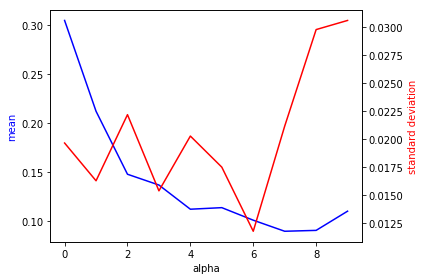

In [51]:
fig, ax1 = plt.subplots()

s1 = mean_list
ax1.plot(s1, 'b')
ax1.set_xlabel('alpha')

ax1.set_ylabel('mean', color='b')

ax2 = ax1.twinx()
s2 = std_list
ax2.plot(s2, 'r')
ax2.set_ylabel('standard deviation', color='r')

fig.tight_layout()
plt.show()